# Atividade Final 
* > objetivo da atividade e analisar o consumo de energia elétrica no Brasil ao longo dos anos

* Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

# Importação bibliateca de funções
from src.data_visulization.visualization import *
from src.data_visulization.grafico import *
from src.data_cleaning.cleaning import drop_duplicados, limpa_dados_NAN

#### Carregamento dos dataset

In [2]:
df_consumo_energia = pd.read_csv("../data/consumo_energia_eletrica.csv", sep=',')
df_estados = pd.read_csv("../data/estado_regiao.csv", sep=';', encoding='ISO-8859-1')

In [3]:
df_consumo_energia

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624
...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461
39893,2023,12,PA,Residencial,2614106.0,478726
39894,2023,12,AC,Residencial,245699.0,58301
39895,2023,12,RN,Residencial,1390080.0,210119


In [4]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


* Realização de união dos dataset com a função merge

In [5]:
df_final = pd.merge(df_consumo_energia, df_estados, left_on='sigla_uf', right_on='sigla')

* exclusão coluna com redundância

In [6]:
df_final.drop(columns='sigla', inplace=True)


In [7]:
df_final.head(10)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,Bahia,Nordeste,Brasil
2,2004,1,PR,Total,NaN,1596274,16,Paraná,Sul,Brasil
3,2004,1,RS,Total,NaN,1780912,21,Rio Grande do Sul,Sul,Brasil
4,2004,1,GO,Total,NaN,630624,9,Goiás,Centro-Oeste,Brasil
5,2004,1,MA,Total,NaN,737033,10,Maranhão,Nordeste,Brasil
6,2004,1,PI,Total,NaN,131052,18,Piauí,Nordeste,Brasil
7,2004,1,RO,Total,NaN,112812,22,Rondônia,Norte,Brasil
8,2004,1,DF,Total,NaN,311459,7,Distrito Federal,Centro-Oeste,Brasil
9,2004,1,SE,Total,NaN,192207,26,Sergipe,Nordeste,Brasil


#### Limpeza e tratamento dos dados

In [8]:
df_final.shape

(39897, 10)

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   sigla_uf             39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
 6   id_estado            39897 non-null  int64  
 7   estado               39897 non-null  object 
 8   regiao               39897 non-null  object 
 9   pais                 39897 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 3.0+ MB


* De acordo com as instruções dos enunciado da atividade
> Instruções para correção de dados ausentes  
> Exclua todos os dados ausentes. 

In [10]:
# importação e utilização de função importada de modulo
limpa_dados_NAN(df_final)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
39893,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
39894,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
39895,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


* Tratamento dos dados duplicados 

In [11]:
visuliza_duplicados(df_final, subset=['consumo', 'ano', 'mes', 'tipo_consumo'])

Existem 1017 registros duplicados.


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
38880,2023,11,MS,Outros,99710.0,122350,12,Mato Grosso do Sul,Centro-Oeste,Brasil
38881,2023,11,RN,Outros,77359.0,112767,20,Rio Grande do Norte,Nordeste,Brasil
38882,2023,11,PE,Outros,157848.0,256509,17,Pernambuco,Nordeste,Brasil
38883,2023,11,ES,Outros,234985.0,180315,8,Espírito Santo,Sudeste,Brasil
38884,2023,11,AC,Outros,23068.0,26323,1,Acre,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
39893,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
39894,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
39895,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


In [12]:
# Irei optar por realizar exclusão dos dados duplicados
drop_duplicados(df_final)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
38875,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
38876,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
38877,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
38878,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


In [13]:
agrupamento_ano = df_final['ano'].value_counts()
agrupamento_ano

ano
2004    1296
2005    1296
2022    1296
2021    1296
2020    1296
2019    1296
2018    1296
2017    1296
2016    1296
2015    1296
2014    1296
2013    1296
2012    1296
2011    1296
2010    1296
2009    1296
2008    1296
2007    1296
2006    1296
2023    1296
Name: count, dtype: int64

In [14]:
agrupamento_consumo = df_final['tipo_consumo'].value_counts()
agrupamento_consumo

tipo_consumo
Outros         6480
Comercial      6480
Industrial     6480
Residencial    6480
Name: count, dtype: int64

* Avaliação das correlações entre os atributos


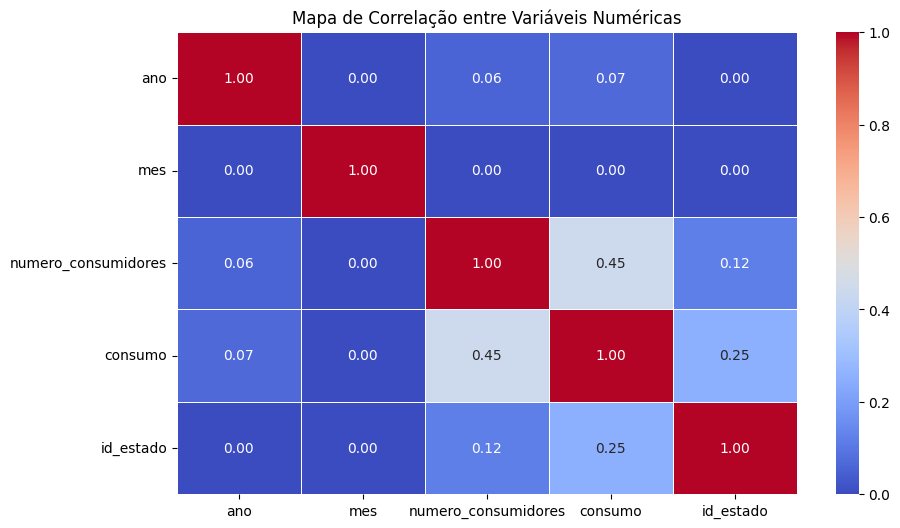

In [15]:
correlacao = df_final.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

#### Analises com base no dataset

1º Evolução do consumo total por ano (nacional)
→ Gráfico de linha do consumo total por ano.

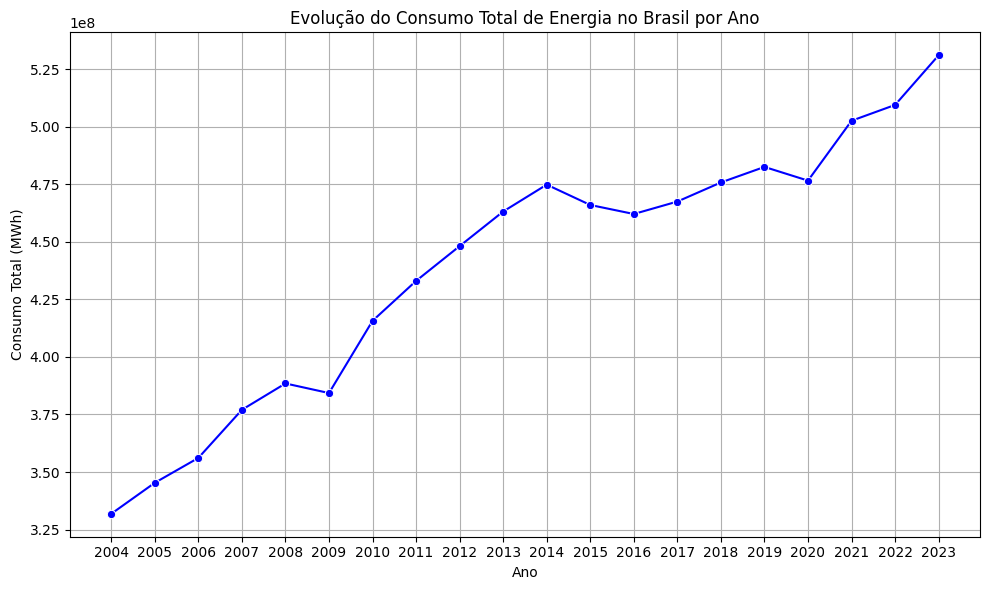

In [16]:
# Agrupa o consumo total por ano
df_consumo_anual = df_final.groupby('ano')['consumo'].sum().reset_index()
df_consumo_anual['ano'] = df_consumo_anual['ano'].astype(str)

# Gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_consumo_anual, x='ano', y='consumo', marker='o', color='blue')

# Estética
plt.title('Evolução do Consumo Total de Energia no Brasil por Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

2º Comparação do consumo por região ao longo dos anos → Linha com hue='regiao' vs. ano.

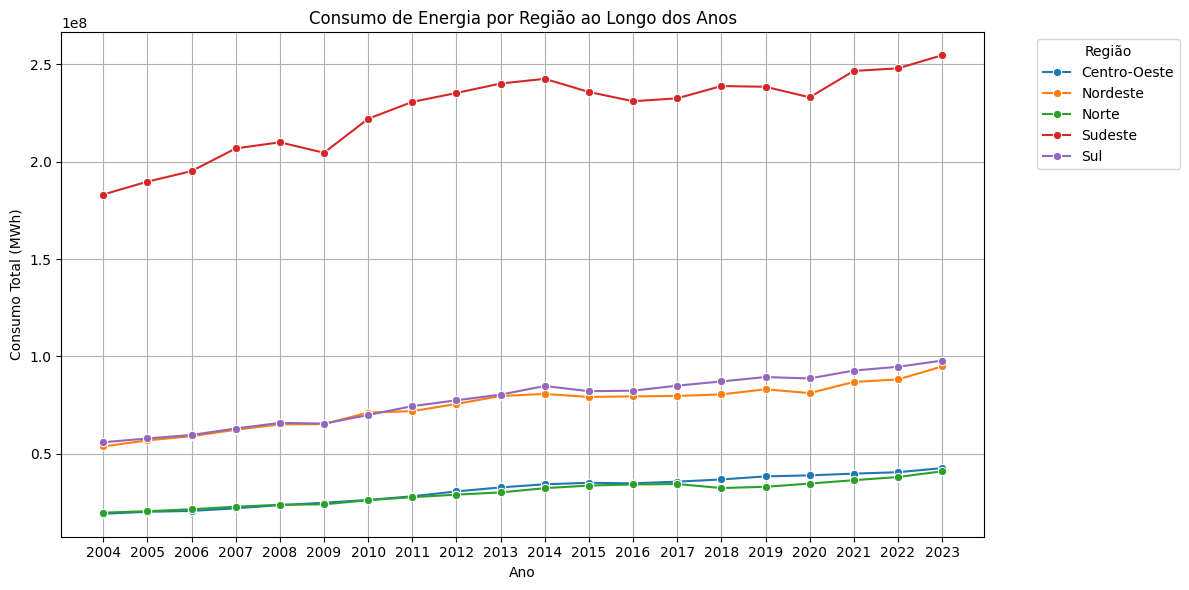

In [17]:
# Agrupa o consumo total por ano e por região
df_regiao_ano = df_final.groupby(['ano', 'regiao'])['consumo'].sum().reset_index()

# Garante que o ano seja tratado como inteiro
df_regiao_ano['ano'] = df_regiao_ano['ano'].astype(str)

# Gráfico de linha com separação por região
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_regiao_ano, x='ano', y='consumo', hue='regiao', marker='o', palette='tab10')

# Estética do gráfico
plt.title('Consumo de Energia por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

3º consumo médio mensal por região, filtrado por um ano

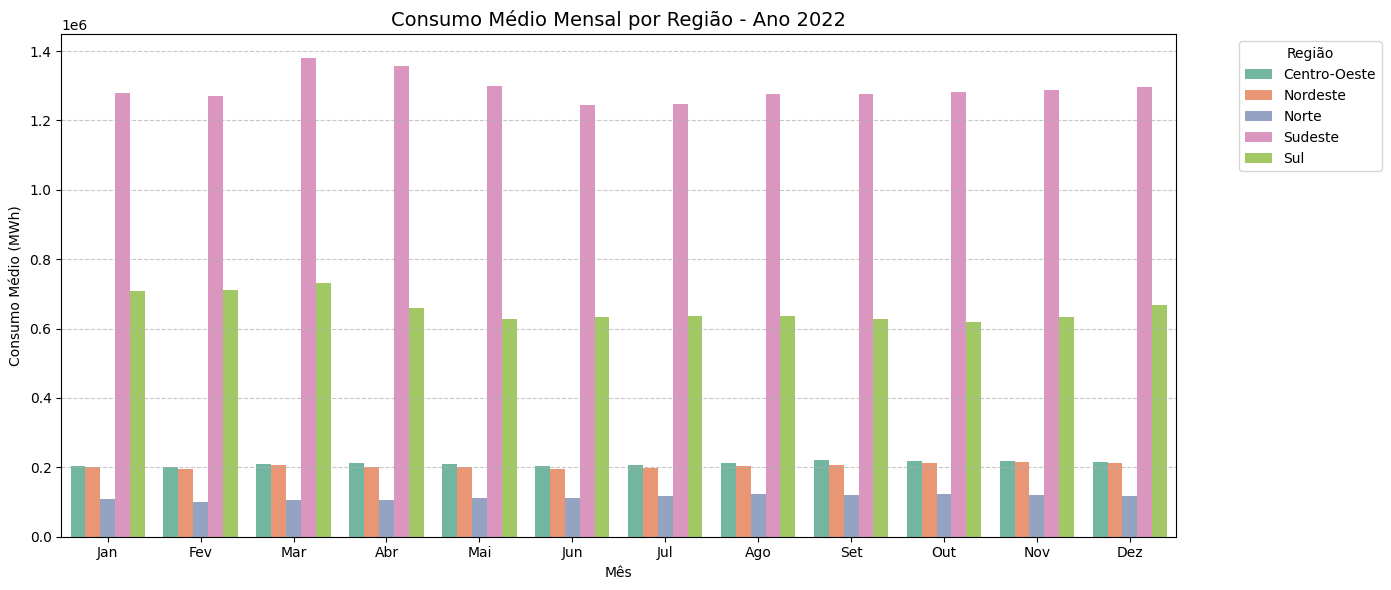

In [18]:
# Define o ano desejado 
ano_escolhido = 2022

# Filtra os dados apenas para o ano escolhido
df_ano = df_final[df_final['ano'] == ano_escolhido]

# Agrupa por mês e região, calculando o consumo médio mensal
df_consumo_mensal = df_ano.groupby(['mes', 'regiao'])['consumo'].mean().reset_index()

# Ordena os meses se forem numéricos
df_consumo_mensal = df_consumo_mensal.sort_values('mes')

# Cria o gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(data=df_consumo_mensal, x='mes', y='consumo', hue='regiao', palette='Set2')

# Adiciona estética
plt.title(f'Consumo Médio Mensal por Região - Ano {ano_escolhido}', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Consumo Médio (MWh)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* Tendência de consumo mensal por ano em uma região específica

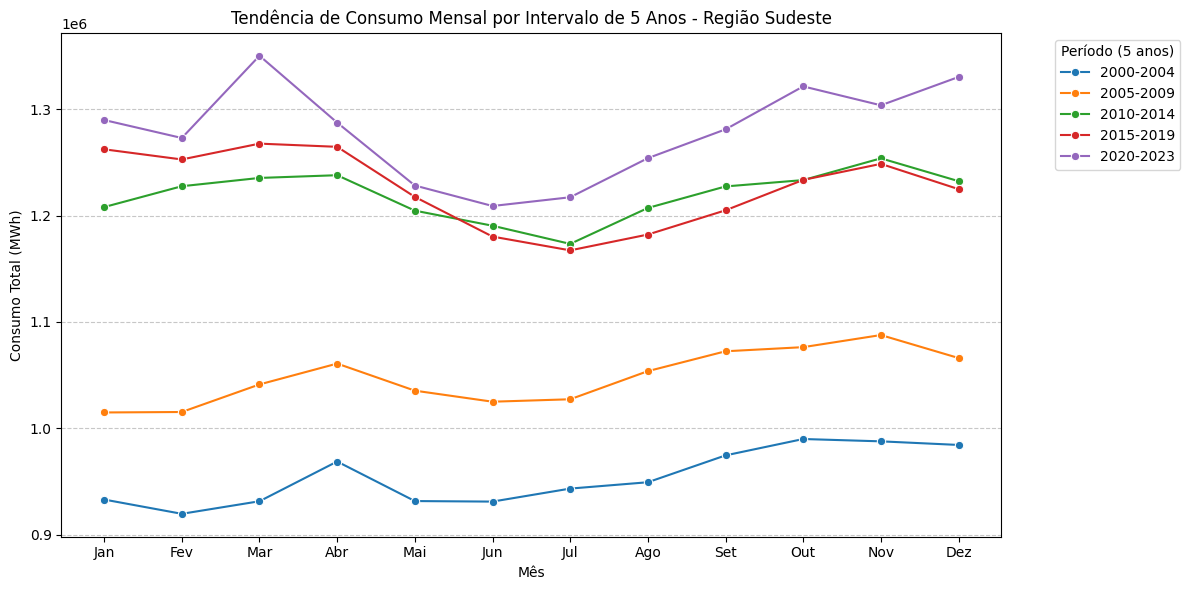

In [19]:
# Define a região desejada
regiao_escolhida = 'Sudeste'

# Filtra os dados apenas da região escolhida
df_regiao = df_final[df_final['regiao'] == regiao_escolhida].copy()

# Determina os anos mínimos e máximos reais do dataset
ano_min = df_regiao['ano'].min()
ano_max = df_regiao['ano'].max()

# Cria função para gerar rótulo de período (ex: "2000–2004")
def gerar_periodo(ano):
    inicio = (ano // 5) * 5
    fim = min(inicio + 4, ano_max)
    return f'{inicio}-{fim}'

# Aplica a função para criar a nova coluna 'periodo'
df_regiao['periodo'] = df_regiao['ano'].apply(gerar_periodo)

# Agrupa por mês e período, somando o consumo
df_mensal_periodo = df_regiao.groupby(['mes', 'periodo'])['consumo'].mean().reset_index()

# Ordena corretamente os períodos
ordem_periodos = sorted(df_mensal_periodo['periodo'].unique())
df_mensal_periodo['periodo'] = pd.Categorical(df_mensal_periodo['periodo'], categories=ordem_periodos, ordered=True)

# Gráfico de linha por período
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mensal_periodo, x='mes', y='consumo', hue='periodo', marker='o', palette='tab10')

# Estética
plt.title(f'Tendência de Consumo Mensal por Intervalo de 5 Anos - Região {regiao_escolhida}')
plt.xlabel('Mês')
plt.ylabel('Consumo Total (MWh)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Período (5 anos)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Consumo por tipo de consumo ao longo dos anos

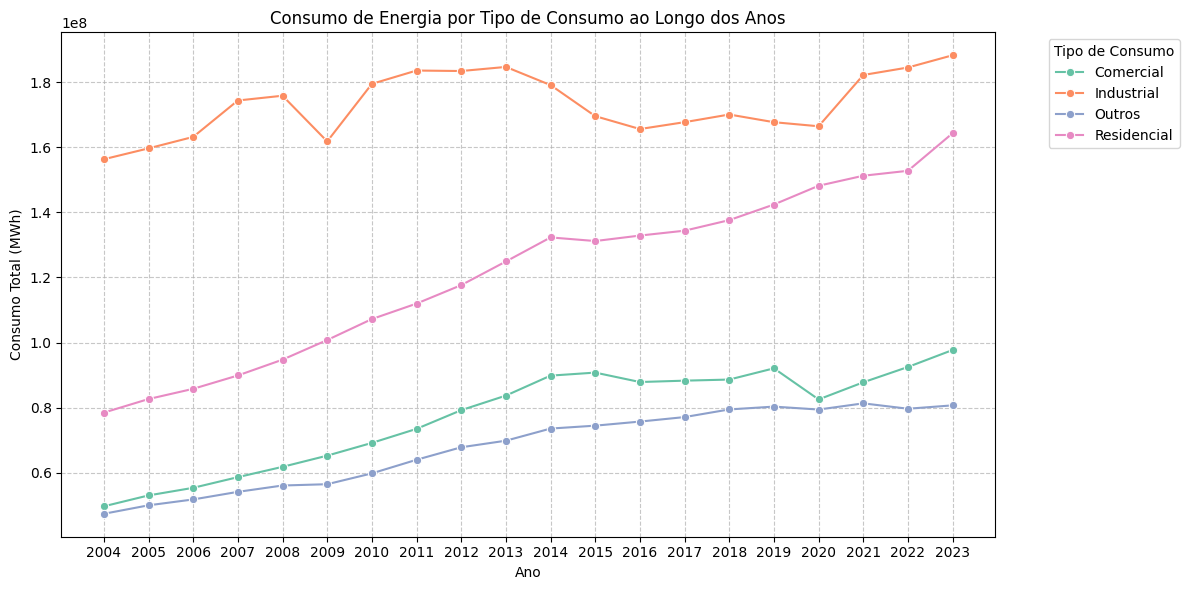

In [20]:
# Agrupa o consumo total por ano e tipo de consumo
df_tipo_ano = df_final.groupby(['ano', 'tipo_consumo'])['consumo'].sum().reset_index()

# Garante que o ano seja inteiro para evitar problemas no eixo x
df_tipo_ano['ano'] = df_tipo_ano['ano'].astype(str)

# Cria o gráfico de linha com hue para tipo de consumo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tipo_ano, x='ano', y='consumo', hue='tipo_consumo', marker='o', palette='Set2')
# sns.lineplot(data=df_tipo_ano, x='ano', y='consumo', hue='tipo_consumo', marker='o')

# Ajustes estéticos
plt.title('Consumo de Energia por Tipo de Consumo ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Consumo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Distribuição do número de consumidores por Região

c:\Users\dyego\Documents\Pos_graduacao_xp\ciencia_de_dados\Atividade_final\notebook\..\src\data_visulization\grafico.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_agrupado, x='regiao', y='numero_consumidores', palette='Set2')


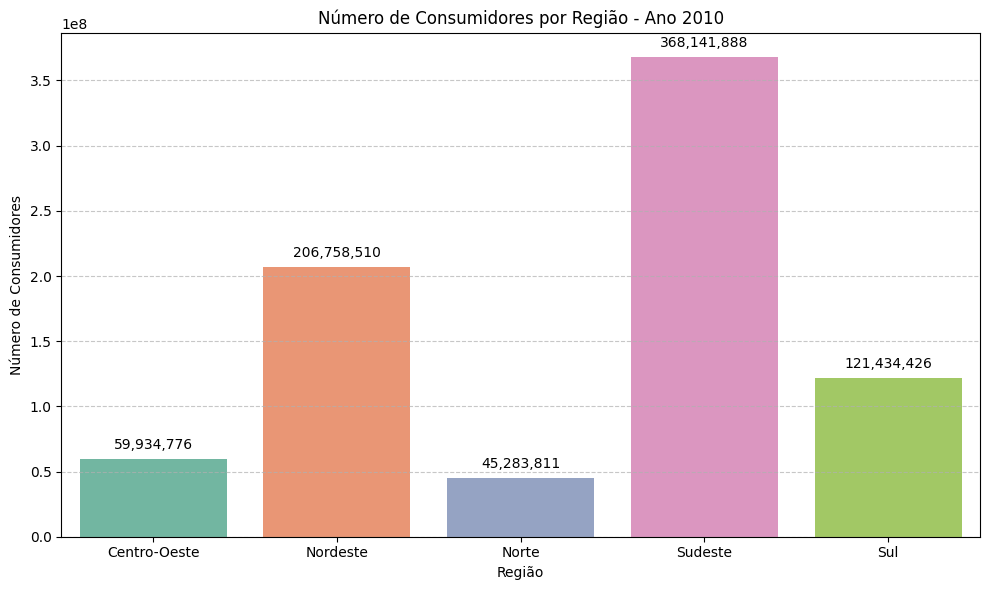

In [21]:
consumidores_por_regiao_ano(df_final, 2010)

* Correlação entre número de consumidores e consumo total por estado

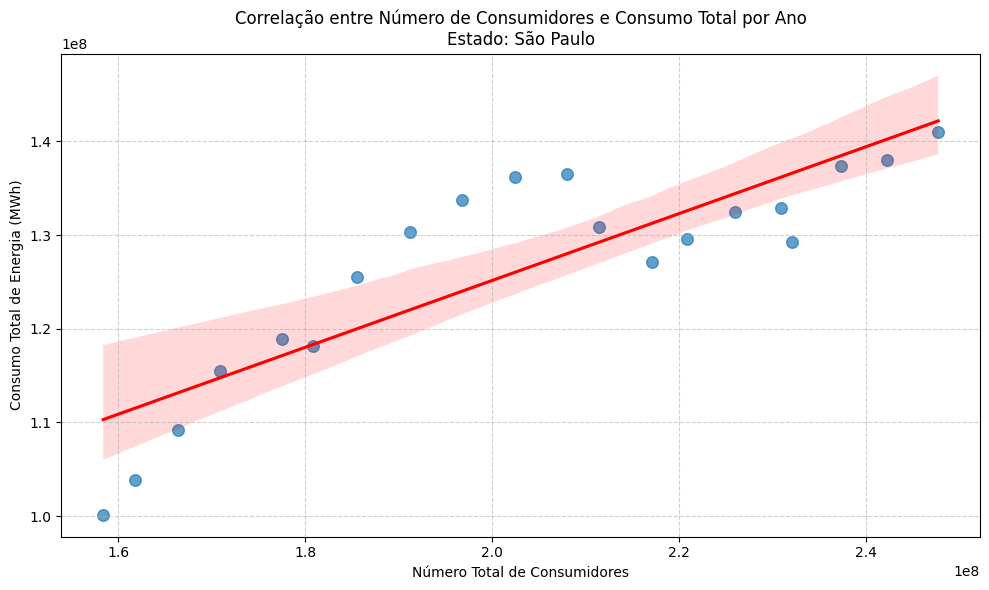

In [22]:
correlacao_consumo_consumidores_por_estado(df_final, 'São Paulo')

* Detecção de outliers no consumo por estado e ano (usando IQR)

Foram encontrados 1153 outliers no consumo.
       ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo  \
0     2020    9       AC  Residencial             224272.0    51911   
1     2020   10       AC  Residencial             224610.0    51275   
2     2020   11       AC  Residencial             224080.0    50342   
3     2020   12       AC  Residencial             225720.0    51488   
4     2021    9       AC  Residencial             226138.0    52116   
...    ...  ...      ...          ...                  ...      ...   
1148  2023    8       TO  Residencial             571344.0   109316   
1149  2023    9       TO  Residencial             571848.0   118517   
1150  2023   10       TO  Residencial             573619.0   129775   
1151  2023   11       TO  Residencial             574934.0   125628   
1152  2023   12       TO  Residencial             576079.0   119941   

      id_estado     estado regiao    pais  
0             1       Acre  Norte  Brasil  
1             1

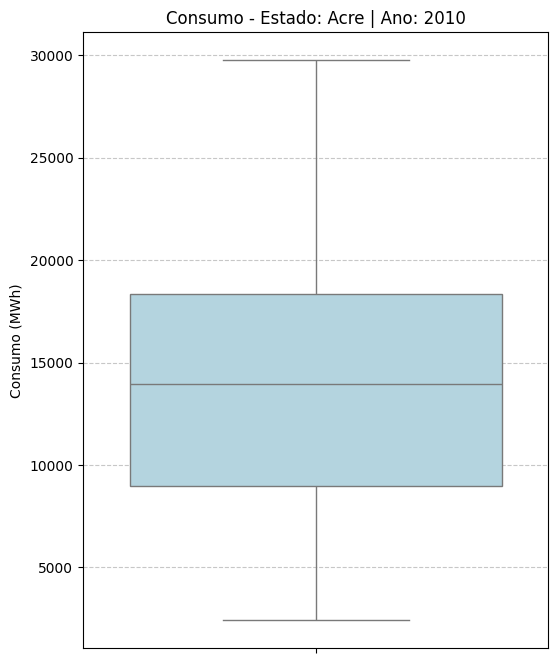

In [23]:
# Detectar outliers no dataset completo
outliers = detectar_outliers_consumo_iqr(df_final)

# Ver os outliers encontrados
print(outliers)

# Plotar boxplot com destaque para um estado e ano específico
plotar_outliers_boxplot(df_final, 'Acre', 2010)


* Os 10 estados que mais consomem energia, por intervalo de ano.


Top 10 estados que mais consumiram energia em 2015:

               estado    consumo
25          São Paulo  130814731
12       Minas Gerais   52816798
20     Rio de Janeiro   41128936
13             Paraná   29861017
19  Rio Grande do Sul   29244578
4               Bahia   24149091
23     Santa Catarina   23048727
15               Pará   19337093
8               Goiás   15030784
16         Pernambuco   13954862


c:\Users\dyego\Documents\Pos_graduacao_xp\ciencia_de_dados\Atividade_final\notebook\..\src\data_visulization\grafico.py:342: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_top10, x='estado', y='consumo', palette='mako')


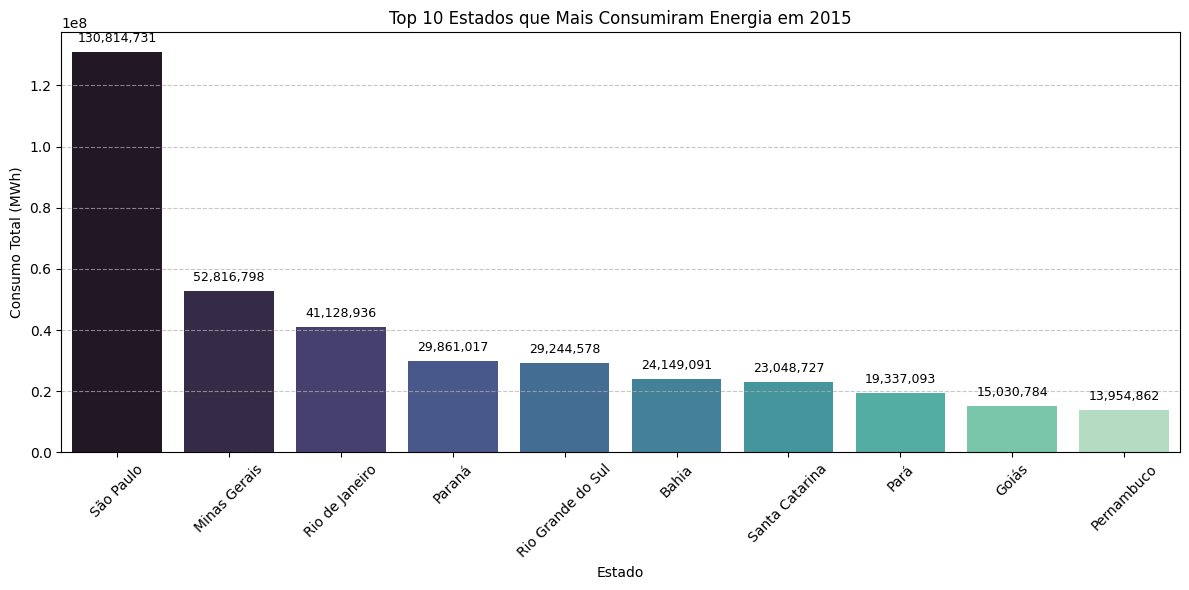

In [24]:
df_top10 = top10_consumo_estados_ano(df_final, 2015)

* Mapa de calor da correlação entre variáveis numéricas (consumo, consumidores)

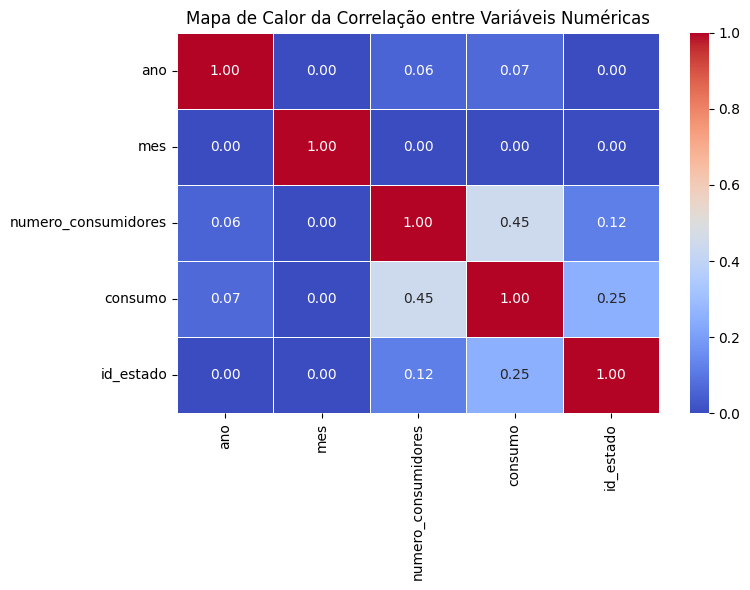

In [25]:
mapa_calor_correlacao(df_final)

# Novo dataset para criação de novos insight com informações de PNAD - PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS 

In [ ]:
df_pnad = pd.read_

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
